<a href="https://colab.research.google.com/github/micattia/Capstone/blob/master/04_Bivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load pandas component for data science
import pandas as pd

#load Apple data 
linkAP1 = 'https://raw.githubusercontent.com/micattia/Capstone/master/AppleFinalData.csv'
dfAPPL = pd.read_csv(linkAP1)
linkAP2 = 'https://raw.githubusercontent.com/micattia/Capstone/master/AppleNewsStock.csv'
dfAPPLnews = pd.read_csv(linkAP2)

#load Microsoft data
linkMS1 = 'https://raw.githubusercontent.com/micattia/Capstone/master/MicrosoftFinalData.csv'
dfMS = pd.read_csv(linkMS1)
linkMS2 = 'https://raw.githubusercontent.com/micattia/Capstone/master/MicrosoftNewsStock.csv'
dfMSnews = pd.read_csv(linkMS2)

# Changing Some column names for the Microsoft main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfMS = dfMS.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})

# Changing Some column names for the Apple main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfAPPL = dfAPPL.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})



In [0]:
#loading required libraries 
#==========================
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import plotly.plotly as py
import plotly.figure_factory as ff
%matplotlib inline

pyplot.style.use('ggplot')

In [0]:
dfMS.head()

,Date,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
0,12/1/2006,29.23,29.30,28.90,29.12,29.12,0.0000,0.000,0.000,0.000
1,12/4/2006,29.23,29.52,29.17,29.33,29.33,-0.7783,0.137,0.863,0.000
2,12/5/2006,29.36,29.40,29.03,29.13,29.13,0.0000,0.000,0.000,0.000
3,12/6/2006,29.10,29.13,28.87,28.99,28.99,0.9003,0.051,0.847,0.102
4,12/7/2006,28.96,29.07,28.81,28.85,28.85,0.6597,0.000,0.810,0.190


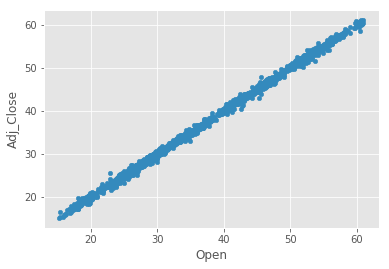

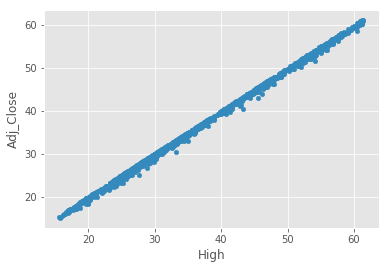

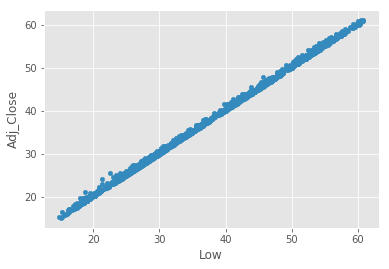

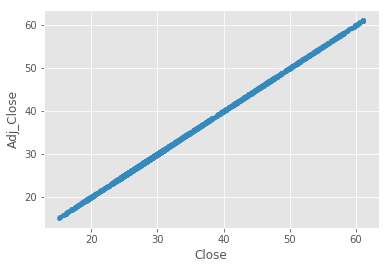

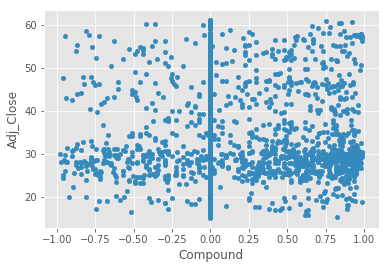

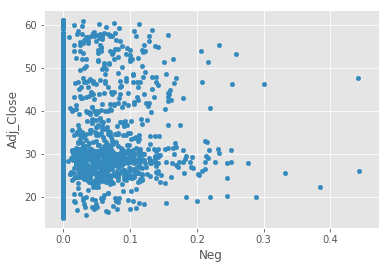

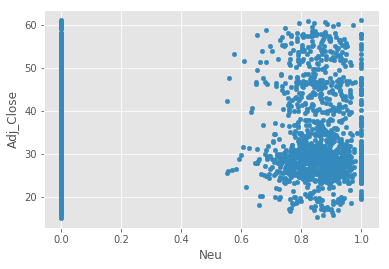

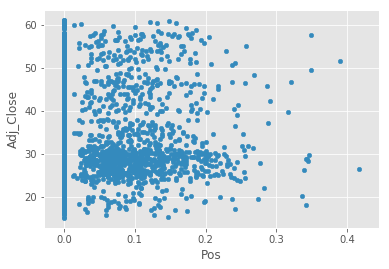

In [0]:
#Scatter Plot between each variable in the Microsoft data set and the dependant variable
dfMS.plot.scatter(x='Open',y='Adj_Close')
dfMS.plot.scatter(x='High',y='Adj_Close')
dfMS.plot.scatter(x='Low',y='Adj_Close')
dfMS.plot.scatter(x='Close',y='Adj_Close')
dfMS.plot.scatter(x='Compound',y='Adj_Close')
dfMS.plot.scatter(x='Neg',y='Adj_Close')
dfMS.plot.scatter(x='Neu',y='Adj_Close')
dfMS.plot.scatter(x='Pos',y='Adj_Close')

In [0]:
# Slicing the Dataset
#ls = dfMS[[str('Date'),'Close','Open']]


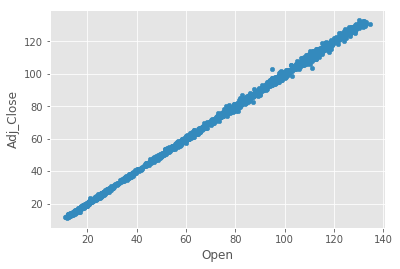

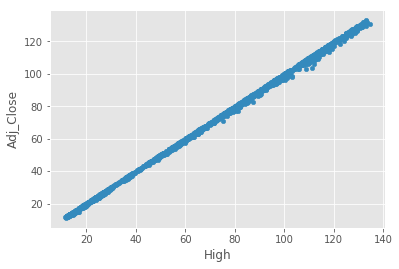

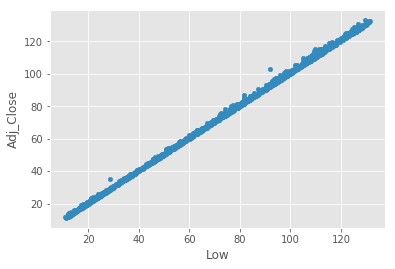

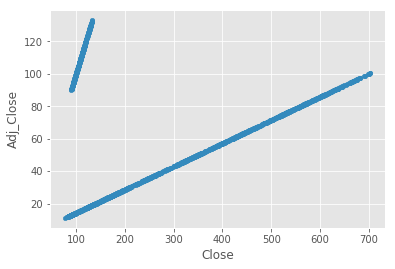

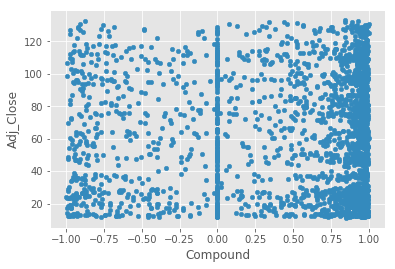

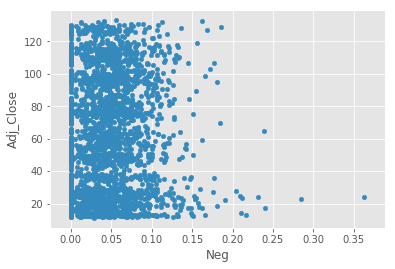

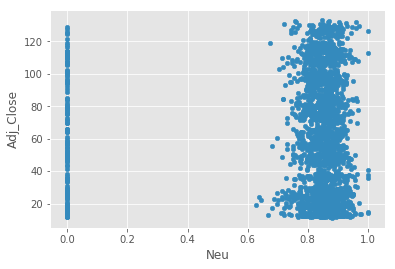

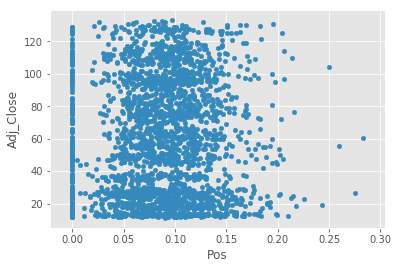

In [0]:
#Scatter Plot between each variable in the Apple data set and the dependant variable
dfAPPL.plot.scatter(x='Open',y='Adj_Close')
dfAPPL.plot.scatter(x='High',y='Adj_Close')
dfAPPL.plot.scatter(x='Low',y='Adj_Close')
dfAPPL.plot.scatter(x='Close',y='Adj_Close')
dfAPPL.plot.scatter(x='Compound',y='Adj_Close')
dfAPPL.plot.scatter(x='Neg',y='Adj_Close')
dfAPPL.plot.scatter(x='Neu',y='Adj_Close')
dfAPPL.plot.scatter(x='Pos',y='Adj_Close')

In [4]:
# Measure the Correlation between Columns in the Microsoft data set
dfMS.corr()

,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
Open,1.000000,0.999567,0.999535,0.999098,0.999098,0.016863,-0.014212,-0.002361,0.015167
High,0.999567,1.000000,0.999411,0.999561,0.999561,0.016935,-0.013980,-0.001810,0.015332
Low,0.999535,0.999411,1.000000,0.999576,0.999576,0.016682,-0.014770,-0.002587,0.013983
Close,0.999098,0.999561,0.999576,1.000000,1.000000,0.016518,-0.014516,-0.002288,0.014104
Adj_Close,0.999098,0.999561,0.999576,1.000000,1.000000,0.016518,-0.014516,-0.002288,0.014104
Compound,0.016863,0.016935,0.016682,0.016518,0.016518,1.000000,-0.315375,0.298019,0.680730
Neg,-0.014212,-0.013980,-0.014770,-0.014516,-0.014516,-0.315375,1.000000,0.444034,0.282799
Neu,-0.002361,-0.001810,-0.002587,-0.002288,-0.002288,0.298019,0.444034,1.000000,0.582143
Pos,0.015167,0.015332,0.013983,0.014104,0.014104,0.680730,0.282799,0.582143,1.000000


In [5]:
# Measure the Correlation between Columns in the Apple data set
dfAPPL.corr()

,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
Open,1.000000,0.999853,0.999817,0.140704,0.999659,0.009487,0.023986,0.018341,0.026119
High,0.999853,1.000000,0.999774,0.140181,0.999843,0.009851,0.024153,0.018570,0.026480
Low,0.999817,0.999774,1.000000,0.140897,0.999843,0.009263,0.023531,0.017542,0.025640
Close,0.140704,0.140181,0.140897,1.000000,0.140605,0.049722,0.013309,0.031983,0.036717
Adj_Close,0.999659,0.999843,0.999843,0.140605,1.000000,0.009836,0.023859,0.018164,0.026172
Compound,0.009487,0.009851,0.009263,0.049722,0.009836,1.000000,-0.497096,0.223225,0.565060
Neg,0.023986,0.024153,0.023531,0.013309,0.023859,-0.497096,1.000000,0.263576,0.155837
Neu,0.018341,0.018570,0.017542,0.031983,0.018164,0.223225,0.263576,1.000000,0.438137
Pos,0.026119,0.026480,0.025640,0.036717,0.026172,0.565060,0.155837,0.438137,1.000000


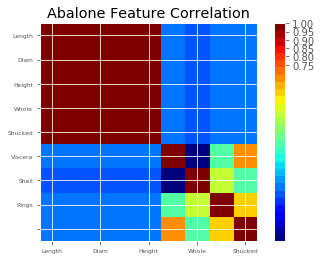

In [3]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(dfMS)